## Machine Learning Model

In [5]:
#Set up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
#Import data
data = pd.read_csv('https://raw.githubusercontent.com/buildwelllabs/machine.learning.project/master/diabetic_data.csv')

In [7]:
#Display top portion of data
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
#Determine null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
#Drop columns that are not necessary for logistic regression model
data.drop(['encounter_id', 'patient_nbr', 'weight', 
           'admission_type_id', 'discharge_disposition_id', 
           'admission_source_id', 'citoglipton', 'glyburide-metformin',
           'glipizide-metformin', 'glimepiride-pioglitazone', 
           'metformin-rosiglitazone','metformin-pioglitazone',
           'payer_code', 'medical_specialty', 'number_outpatient', 
           'max_glu_serum', 'metformin', 
           'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 
           'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
           'troglitazone', 'tolazamide', 'examide', 'A1Cresult'],
          axis=1, inplace=True)
data

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,250.83,?,?,1,No,No,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,276,250.01,255,9,Up,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,0,1,648,250,V27,6,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,8,250.43,403,7,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,197,157,250,5,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,51,0,16,0,0,250.13,291,458,9,Down,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),5,33,3,18,0,1,560,276,787,9,Steady,No,Yes,NO
101763,Caucasian,Male,[70-80),1,53,0,9,0,0,38,590,296,13,Down,Ch,Yes,NO
101764,Caucasian,Female,[80-90),10,45,2,21,0,1,996,285,998,9,Up,Ch,Yes,NO


In [10]:
# Drop missing values 
drop1 = set(data[(data['diag_1'] == '?') & (data['diag_2'] == '?') & (data['diag_3'] == '?')].index)
drop1 = drop1.union(set(data['diag_1'][data['diag_1'] == '?'].index))
drop1 = drop1.union(set(data['diag_2'][data['diag_2'] == '?'].index))
drop1 = drop1.union(set(data['diag_3'][data['diag_3'] == '?'].index))
drop1 = drop1.union(set(data['race'][data['race'] == '?'].index))
drop1 = drop1.union(set(data['gender'][data['gender'] == 'Unknown/Invalid'].index))
new1 = list(set(data.index) - set(drop1))
data = data.iloc[new1]
data

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),3,59,0,18,0,0,276,250.01,255,9,Up,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,0,1,648,250,V27,6,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,8,250.43,403,7,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,197,157,250,5,Steady,Ch,Yes,NO
5,Caucasian,Male,[50-60),3,31,6,16,0,0,414,411,250,9,Steady,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,51,0,16,0,0,250.13,291,458,9,Down,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),5,33,3,18,0,1,560,276,787,9,Steady,No,Yes,NO
101763,Caucasian,Male,[70-80),1,53,0,9,0,0,38,590,296,13,Down,Ch,Yes,NO
101764,Caucasian,Female,[80-90),10,45,2,21,0,1,996,285,998,9,Up,Ch,Yes,NO


## Exploratory Data Analysis

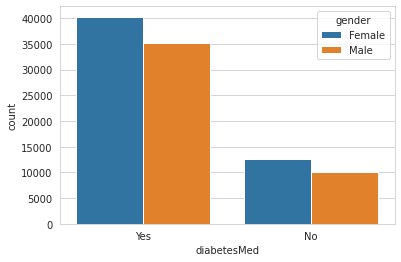

In [11]:
# Display the number of diabetes medication taken and gender of patients
sns.set_style('whitegrid')
sns.countplot(x='diabetesMed', hue='gender', data=data)

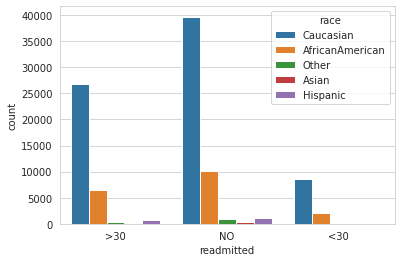

In [12]:
# Display readmit count with patient race
sns.set_style('whitegrid')
sns.countplot(x='readmitted', hue='race', data=data)

In [ ]:
# Replace non-numerical data values to numerical values in each column
data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)

data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)

data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)
 
data['race'] = data['race'].replace('Caucasian', 4)
data['race'] = data['race'].replace('AfricanAmerican', 3)
data['race'] = data['race'].replace('Other', 2)
data['race'] = data['race'].replace('Asian', 1)
data['race'] = data['race'].replace('Hispanic', 0)

data['age'] = data['age'].replace('[0-10)', 5)
data['age'] = data['age'].replace('[10-20)', 15)
data['age'] = data['age'].replace('[20-30)', 25)
data['age'] = data['age'].replace('[30-40)', 35)
data['age'] = data['age'].replace('[40-50)', 45)
data['age'] = data['age'].replace('[50-60)', 55)
data['age'] = data['age'].replace('[60-70)', 65)
data['age'] = data['age'].replace('[70-80)', 75)
data['age'] = data['age'].replace('[80-90)', 85)
data['age'] = data['age'].replace('[90-100)', 95)

data['insulin'] = data['insulin'].replace('No', 0)
data['insulin'] = data['insulin'].replace('Steady', 1)
data['insulin'] = data['insulin'].replace('Down', 2)
data['insulin'] = data['insulin'].replace('Up', 3)

data['readmitted'] = data['readmitted'].replace('NO', 0)
data['readmitted'] = data['readmitted'].replace('>30', 0)
data['readmitted'] = data['readmitted'].replace('<30', 1)

## Model Building

In [16]:
# Determine independent and depedent variables
## This model displays if diabetic patient will be readmitted to hospital
ds=data

y = ds['readmitted']
X = ds[['time_in_hospital', 'age','race', 'gender', 'insulin', 'change', 'diabetesMed', 'num_medications', 'num_lab_procedures']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Logistic Regression

In [17]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = logmodel.predict(X_test)

print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     21700
           1       0.00      0.00      0.00      2813

    accuracy                           0.89     24513
   macro avg       0.44      0.50      0.47     24513
weighted avg       0.78      0.89      0.83     24513



[[21700     0]
 [ 2813     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision and recall values were low for logistic regression model. 

This may be due to data imbalances with a prediction of higher number of patients not being readmitted to hospital than being readmitted.

## Decision Tree Model

In [19]:
#SMOTE to account for data imbalances. Decision Tree model used to achieve better prediction capabilities:
 
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape Counter({0: 65286, 1: 8253})
New dataset shape Counter({1: 65286, 0: 65286})


In [20]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
 
 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
 
print(classification_report(y_test, dtree_pred))
print('\n')
print(confusion_matrix(y_test, dtree_pred))


              precision    recall  f1-score   support

           0       0.82      0.93      0.87     12975
           1       0.92      0.80      0.86     13140

    accuracy                           0.86     26115
   macro avg       0.87      0.86      0.86     26115
weighted avg       0.87      0.86      0.86     26115



[[12053   922]
 [ 2621 10519]]


The Decision Tree model gave a better prediction output after balancing data. 

The model is 82% precise in predicting that a diabetic patient will not be readmitted to the hospital. 

The model is 92% precise in predicting if a diabetic patient will be readmitted to the hospital. 

The model has a 93% true positive rate in accurately displaying diabetic patients who were not readmitted to the hospital. 

The model has a 80% true negative rate in accurately displaying diabetic patients who were readmitted to the hospital. 

## Confusion Matrix

In [21]:
predict = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

[[12053   922]
 [ 2621 10519]]


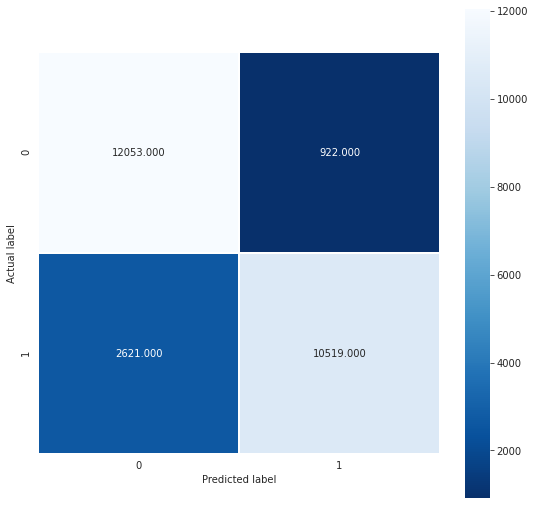

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

The Confusion matrix displays the numbers used to determine the rates in the decision tree model. 